# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [22]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')


In [23]:
#Exploring the data
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [24]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [26]:

import numpy as np

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1)/ n
    return x, y

In [27]:
temp_array = np.array(df.temperature)

In [28]:
# Create an ECDF from real data: x, y
x, y = ecdf(temp_array)

In [29]:
temp_array

array([ 99.3,  98.4,  97.8,  99.2,  98. ,  99.2,  98. ,  98.8,  98.4,
        98.6,  98.8,  96.7,  98.2,  98.7,  97.8,  98.8,  98.3,  98.2,
        97.2,  99.4,  98.3,  98.2,  98.6,  98.4,  97.8,  98. ,  97.8,
        98.2,  98.4,  98.1,  98.3,  97.6,  98.5,  98.6,  99.3,  99.5,
        99.1,  98.3,  97.9,  96.4,  98.4,  98.4,  96.9,  97.2,  99. ,
        97.9,  97.4,  97.4,  97.9,  97.1,  98.9,  98.3,  98.5,  98.6,
        98.2,  98.6,  98.8,  98.2,  98.2,  97.6,  99.1,  98.4,  98.2,
        98.6,  98.7,  97.4,  97.4,  98.6,  98.7,  98.9,  98.1,  97.7,
        98. ,  98.8,  99. ,  98.8,  98. ,  98.4,  97.4,  97.6,  98.8,
        98. ,  97.5,  99.2,  98.6,  97.1,  98.6,  98. ,  98.7,  98.1,
        97.8, 100. ,  98.8,  97.1,  97.8,  96.8,  99.9,  98.7,  98.8,
        98. ,  99. ,  98.5,  98. ,  99.4,  97.6,  96.7,  97. ,  98.6,
        98.7,  97.3,  98.8,  98. ,  98.2,  99.1,  99. ,  98. , 100.8,
        97.8,  98.7,  98.4,  97.7,  97.9,  99. ,  97.2,  97.5,  96.3,
        97.7,  98.2,

In [30]:
# Generate plot
import matplotlib.pyplot as plt

temp_plot = plt.plot(x, y, marker='.', linestyle='none')
temp_plot = plt.xlabel('Body Temperatures Normal')
temp_plot = plt.ylabel('ECDF')
plt.show()

<Figure size 640x480 with 1 Axes>

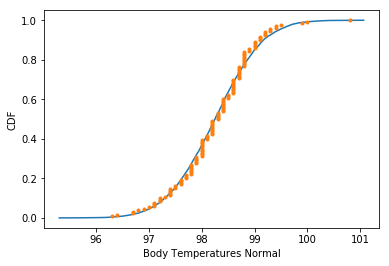

In [31]:
# Calculate the Mean and the standard deviation

mu = np.mean(temp_array)
sigma = np.std(temp_array)


# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor  = ecdf(samples)
x, y = ecdf(temp_array)


# Plot the CDFs and show the plot
temp_plot = plt.plot(x_theor, y_theor)
temp_plot = plt.plot(x, y, marker='.', linestyle='none')
temp_plot = plt.xlabel('Body Temperatures Normal')
temp_plot = plt.ylabel('CDF')
plt.show()


Therefore, we can say that the distribution of body temperatures is normal

In [32]:
#Is the true population mean really 98.6 degrees F?
temp_mean = temp_array.mean()
round(temp_mean, 2)

98.25

In [33]:
#https://pypi.org/project/bootstrapped/
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

temp_mean = temp_array.mean()
temp_std = temp_array.std()

population = np.random.normal(loc=temp_mean, scale=temp_std, size=50000)

# take 1k 'samples' from the larger population
samples = population[:1000]

print(bs.bootstrap(samples, stat_func=bs_stats.mean))

print(bs.bootstrap(samples, stat_func=bs_stats.std))


98.25144122372282    (98.20850633728531, 98.29473913131659)
0.6949363663837764    (0.6671494308464294, 0.7242415846022713)


In [34]:
#!pip install bootstrapped

In [35]:
# Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
from scipy import stats
#Sample Size
sample = np.random.normal(mu, sigma, size=130)

## Cross Checking with the internal scipy function with two samples
t2, p2 = stats.ttest_ind(temp_array,sample)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = -0.12990531038806455
p = 1.793485130421512


In [36]:
# z test is created using one sample
#  frequentist approach is the same as z test / t test (samples less than 30)
from statsmodels.stats import weightstats as stests
stests.ztest(temp_array,value=temp_mean)



(0.0, 1.0)

In [37]:
#Draw a small sample of size 10 from the data and repeat both frequentist tests.
#Sample Size
sample2 = np.random.normal(mu, sigma, size=10)
## Running the t test
t3, p3 = stats.ttest_ind(temp_array,sample2)
print("t = " + str(t3))
print("p = " + str(2*p3))



t = -1.5788363560509049
p = 0.23332617104965217


In [38]:
# Frequentelist Approach

low_range = temp_mean - 2*temp_std
upper_range = temp_mean + 2*temp_std
print("Based on Frequentlist approach the lowwer range & upper range are",low_range, upper_range)


Based on Frequentlist approach the lowwer range & upper range are 96.78851521142067 99.70994632704083


In [39]:
#Call the draw function resps
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [43]:
def bootstrap_replicate_1d(temp_array, func):
    return func(np.random.choice(temp_array, size=len(temp_array)))

# Bootstrap approach:
bs= np.random.choice(temp_array,10000)
bs_means= draw_bs_reps(bs,np.mean,10000)
bs_std= draw_bs_reps(bs,np.std,10000)
bs_std_mean=np.mean(bs_std)
bs_interv_95= np.percentile(bs_means,[2.5,97.5])
print("95% confidence interval: ", bs_interv_95 )
print('Abnormal temperatures at:', bs_interv_95[0]-bs_std_mean*2, 'and below with a std of 2')
print('Abrnomal temperatures at:', bs_interv_95[1]+bs_std_mean*2, 'and above with a std of 2')


95% confidence interval:  [98.22880975 98.25813   ]
Abnormal temperatures at: 96.75725673160765 and below with a std of 2
Abrnomal temperatures at: 99.72968301839235 and above with a std of 2


In [41]:
# https://www.isixsigma.com/tools-templates/sampling-data/margin-error-and-confidence-levels-made-simple/
# Margin error is the same as finding the range 


In [55]:
male_temps = df.temperature[df.gender == 'M']
female_temps = df.temperature[df.gender == 'F']
print('Mean body temp of male samples: ', np.mean(male_temps))
print('Mean body temp of female samples: ', np.mean(female_temps))


Mean body temp of male samples:  98.1046153846154
Mean body temp of female samples:  98.39384615384613


In [53]:
# Compute mean of all forces: mean_force
import numpy as np
mean_female_temp = np.mean(female_temps)
mean_male_temp  = np.mean(male_temps)

# Generate shifted arrays
a_shifted = mean_female_temp - np.mean(mean_female_temp) + mean_female_temp
b_shifted = mean_male_temp - np.mean(mean_male_temp) + mean_male_temp

a_shifted,b_shifted

(98.39384615384613, 98.1046153846154)

In [54]:
#Call boostrap_replicate
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))


def bootstrap_replicate_1d(female_temps, func):
    return func(np.random.choice(female_temps, size=len(female_temps)))


# Bootstrap approach for females:
bs= np.random.choice(female_temps,10000)
bs_means= draw_bs_reps(bs,np.mean,10000)
bs_std= draw_bs_reps(bs,np.std,10000)
bs_std_mean=np.mean(bs_std)
bs_interv_95= np.percentile(bs_means,[2.5,97.5])
print("95% confidence interval: ", bs_interv_95 )
print('Abnormal temperatures at female_temps:', bs_interv_95[0]-bs_std_mean*2, 'and below with a std of 2')
print('Abrnomal temperatures at female_temps:', bs_interv_95[1]+bs_std_mean*2, 'and above with a std of 2')


95% confidence interval:  [98.38216975 98.41103   ]
Abnormal temperatures at female_temps: 96.91761724736426 and below with a std of 2
Abrnomal temperatures at female_temps: 99.87558250263575 and above with a std of 2


In [50]:
# Bootstrap approach for males:
bs= np.random.choice(male_temp,10000)
bs_means= draw_bs_reps(bs,np.mean,10000)
bs_std= draw_bs_reps(bs,np.std,10000)
bs_std_mean=np.mean(bs_std)
bs_interv_95= np.percentile(bs_means,[2.5,97.5])
print("95% confidence interval: ", bs_interv_95 )
print('Abnormal temperatures at male_temps:', bs_interv_95[0]-bs_std_mean*2, 'and below with a std of 2')
print('Abrnomal temperatures at male_temps :', bs_interv_95[1]+bs_std_mean*2, 'and above with a std of 2')

95% confidence interval:  [98.0955895 98.1229905]
Abnormal temperatures at male_temp: 96.70274077244103 and below with a std of 2
Abrnomal temperatures at male_temp : 99.51583922755896 and above with a std of 2


In [57]:
#we can again use a t-test as we are comparing the means from two samples
male_temps = df.temperature[df.gender == 'M']
female_temps = df.temperature[df.gender == 'F']

print('Mean body temp of male temperature samples: ', np.mean(male_temps))
print('Mean body temp of female temperature samples: ', np.mean(female_temps))

gender_ttest, gender_pv = stats.ttest_ind(a=male_temps, b=female_temps, equal_var=False)
print('The T-test is %d with a p-value of %s' %(abs(gender_ttest), gender_pv))

Mean body temp of male temperature samples:  98.1046153846154
Mean body temp of female temperature samples:  98.39384615384613
The T-test is 2 with a p-value of 0.023938264182934196
